In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./Amazon_Sale_Report.csv')
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,8140,404-9535689-6711555,04-25-22,Cancelled,Merchant,Amazon.in,Standard,J0237,J0237-SKD-XXXL,Set,...,INR,1121.43,KANCHRAPARA,WEST BENGAL,743145.0,IN,NaN,False,Easy Ship,NaN
8141,8141,408-8423073-8240350,04-25-22,Cancelled,Merchant,Amazon.in,Standard,JNE3810,JNE3810-KR-XS,kurta,...,INR,662.86,Kechery,KERALA,680501.0,IN,NaN,False,Easy Ship,NaN
8142,8142,406-3311010-6186704,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0401,J0401-DR-S,Western Dress,...,INR,885.00,LUDHIANA,PUNJAB,141001.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8143,8143,404-6022453-9599521,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3617,JNE3617-KR-S,kurta,...,INR,299.00,BENGALURU,KARNATAKA,560079.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [ ]:
df = df.drop(['Order ID', 'index', 'ASIN', 'ship-postal-code', 'promotion-ids', 'ship-country'], axis=1)
df

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by,Unnamed: 22
0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,NaN,0.0,INR,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship,NaN
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,False,Easy Ship,NaN
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN,NaN
3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,NaN,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship,NaN
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,Shipped,1.0,INR,574.00,CHENNAI,TAMIL NADU,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,04-25-22,Cancelled,Merchant,Amazon.in,Standard,J0237,J0237-SKD-XXXL,Set,3XL,NaN,0.0,INR,1121.43,KANCHRAPARA,WEST BENGAL,False,Easy Ship,NaN
8141,04-25-22,Cancelled,Merchant,Amazon.in,Standard,JNE3810,JNE3810-KR-XS,kurta,XS,NaN,0.0,INR,662.86,Kechery,KERALA,False,Easy Ship,NaN
8142,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0401,J0401-DR-S,Western Dress,S,Shipped,1.0,INR,885.00,LUDHIANA,PUNJAB,False,Easy Ship,NaN
8143,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3617,JNE3617-KR-S,kurta,S,Shipped,1.0,INR,299.00,BENGALURU,KARNATAKA,False,NaN,NaN


In [ ]:
df.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'Courier Status', 'Qty', 'currency',
       'Amount', 'ship-city', 'ship-state', 'B2B', 'fulfilled-by',
       'Unnamed: 22'],
      dtype='object')

In [ ]:
# Check for any NaN values
has_nan = df.isnull().values.any()
print(has_nan)

# Count NaN values in each column
nan_counts = df.isnull().sum()
print(nan_counts)

True
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 1
Size                     1
Courier Status         520
Qty                      1
currency               502
Amount                 502
ship-city                3
ship-state               3
B2B                      1
fulfilled-by          5214
Unnamed: 22           8145
dtype: int64


In [ ]:
# # Drop rows with any NaN values
# df_clean = df.dropna()
# print(df)

          Date                        Status Fulfilment Sales Channel   \
0     04-30-22                     Cancelled   Merchant      Amazon.in   
1     04-30-22  Shipped - Delivered to Buyer   Merchant      Amazon.in   
2     04-30-22                       Shipped     Amazon      Amazon.in   
3     04-30-22                     Cancelled   Merchant      Amazon.in   
4     04-30-22                       Shipped     Amazon      Amazon.in   
...        ...                           ...        ...            ...   
8140  04-25-22                     Cancelled   Merchant      Amazon.in   
8141  04-25-22                     Cancelled   Merchant      Amazon.in   
8142  04-25-22  Shipped - Delivered to Buyer   Merchant      Amazon.in   
8143  04-25-22                       Shipped     Amazon      Amazon.in   
8144  04-25-22  Shipped - Delivered to Buyer   Merchant      Amazon.in   

     ship-service-level    Style              SKU       Category Size  \
0              Standard   SET389   SET

In [ ]:
df

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by,Unnamed: 22
0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,NaN,0.0,INR,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship,NaN
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,False,Easy Ship,NaN
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN,NaN
3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,NaN,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship,NaN
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,Shipped,1.0,INR,574.00,CHENNAI,TAMIL NADU,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,04-25-22,Cancelled,Merchant,Amazon.in,Standard,J0237,J0237-SKD-XXXL,Set,3XL,NaN,0.0,INR,1121.43,KANCHRAPARA,WEST BENGAL,False,Easy Ship,NaN
8141,04-25-22,Cancelled,Merchant,Amazon.in,Standard,JNE3810,JNE3810-KR-XS,kurta,XS,NaN,0.0,INR,662.86,Kechery,KERALA,False,Easy Ship,NaN
8142,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0401,J0401-DR-S,Western Dress,S,Shipped,1.0,INR,885.00,LUDHIANA,PUNJAB,False,Easy Ship,NaN
8143,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3617,JNE3617-KR-S,kurta,S,Shipped,1.0,INR,299.00,BENGALURU,KARNATAKA,False,NaN,NaN


In [ ]:
# # Reset the index in-place
# df.reset_index(drop=True, inplace=True)
# print(df)

Empty DataFrame
Columns: [Date, Status, Fulfilment, Sales Channel , ship-service-level, Style, SKU, Category, Size, Courier Status, Qty, currency, Amount, ship-city, ship-state, B2B, fulfilled-by, Unnamed: 22]
Index: []


In [ ]:
df

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,B2B,fulfilled-by,Unnamed: 22
0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,NaN,0.0,INR,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship,NaN
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,False,Easy Ship,NaN
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN,NaN
3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,NaN,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship,NaN
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,Shipped,1.0,INR,574.00,CHENNAI,TAMIL NADU,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,04-25-22,Cancelled,Merchant,Amazon.in,Standard,J0237,J0237-SKD-XXXL,Set,3XL,NaN,0.0,INR,1121.43,KANCHRAPARA,WEST BENGAL,False,Easy Ship,NaN
8141,04-25-22,Cancelled,Merchant,Amazon.in,Standard,JNE3810,JNE3810-KR-XS,kurta,XS,NaN,0.0,INR,662.86,Kechery,KERALA,False,Easy Ship,NaN
8142,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0401,J0401-DR-S,Western Dress,S,Shipped,1.0,INR,885.00,LUDHIANA,PUNJAB,False,Easy Ship,NaN
8143,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3617,JNE3617-KR-S,kurta,S,Shipped,1.0,INR,299.00,BENGALURU,KARNATAKA,False,NaN,NaN


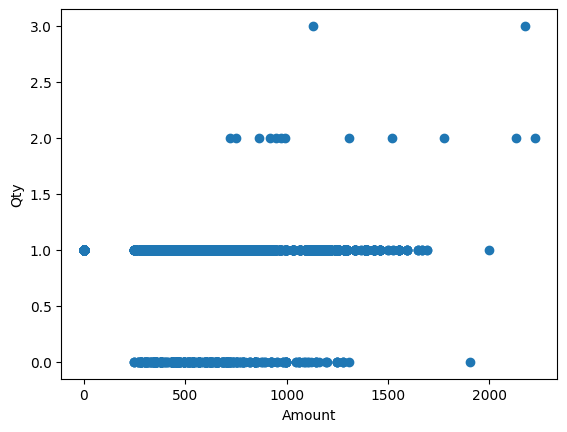

In [ ]:
# Plot scatter plot for Amount vs Qty
import matplotlib.pyplot as plt
plt.scatter(df['Amount'], df['Qty'])
plt.xlabel('Amount')
plt.ylabel('Qty')
plt.show()

<Axes: ylabel='count'>

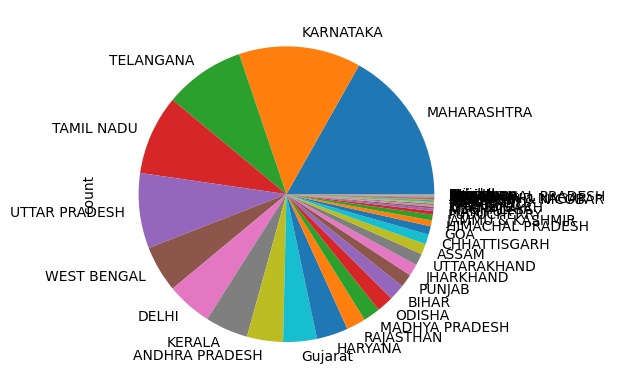

In [ ]:
# Plot a Pie chart for the dataset inclusing categorical columns
df['ship-state'].value_counts().plot(kind='pie')

In [ ]:
# Count occurence of each unique value in ship-state column
df['ship-state'].value_counts()

# drop the rows having ship-state value that has occurence less than 50
df = df[df['ship-state'].isin(df['ship-state'].value_counts()[df['ship-state'].value_counts() >= 80].index)]

In [ ]:
df['ship-state'].value_counts()

,count
ship-state,
MAHARASHTRA,1370
KARNATAKA,1088
TELANGANA,717
TAMIL NADU,709
UTTAR PRADESH,670
WEST BENGAL,414
DELHI,406
KERALA,382
ANDHRA PRADESH,321


<Axes: ylabel='count'>

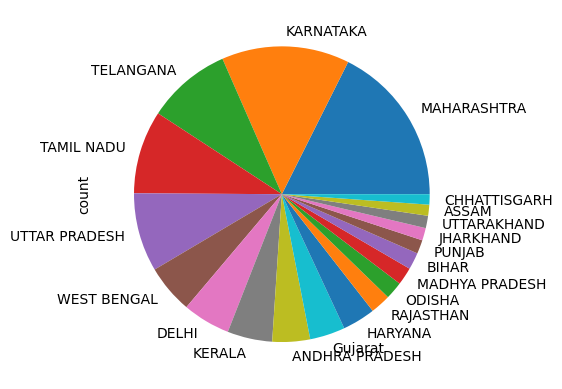

In [ ]:
# Plot a Pie chart for the dataset inclusing categorical columns
df['ship-state'].value_counts().plot(kind='pie')

<Axes: xlabel='ship-state'>

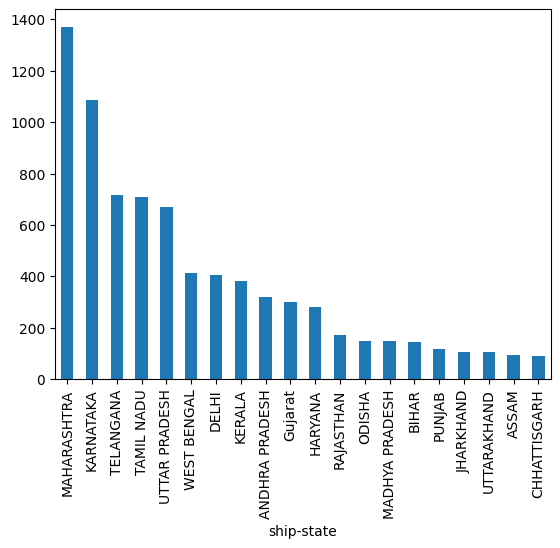

In [ ]:
# Bar graph for ship-state column
df['ship-state'].value_counts().plot(kind='bar')

In [ ]:
print(df['Category'].value_counts())
# drop the rows having ship-state value that has occurence less than 50
df = df[df['Category'].isin(df['Category'].value_counts()[df['Category'].value_counts() >= 45].index)]

Category
Set              3137
kurta            3123
Western Dress     703
Top               667
Blouse             63
Ethnic Dress       40
Bottom             35
Saree              15
Name: count, dtype: int64


<Axes: ylabel='count'>

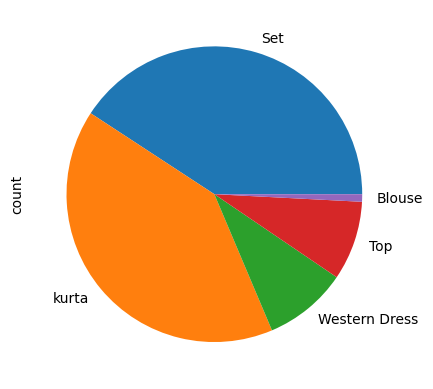

In [ ]:
df['Category'].value_counts().plot(kind='pie')

<Axes: xlabel='Category'>

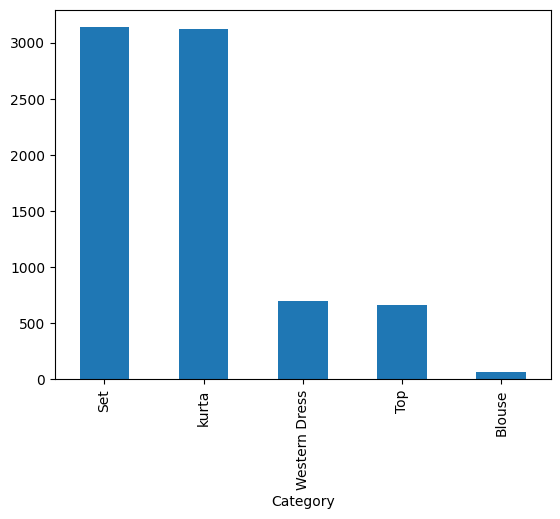

In [ ]:
# Bar graph for Category column
df['Category'].value_counts().plot(kind='bar')

In [ ]:
df['Status'].value_counts()
df = df[df['Status'].isin(df['Status'].value_counts()[df['Status'].value_counts() >= 300].index)]

<Axes: ylabel='count'>

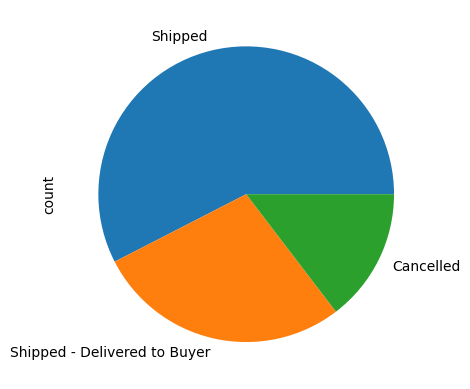

In [ ]:
df['Status'].value_counts().plot(kind='pie')

<Axes: xlabel='Date', ylabel='Amount'>

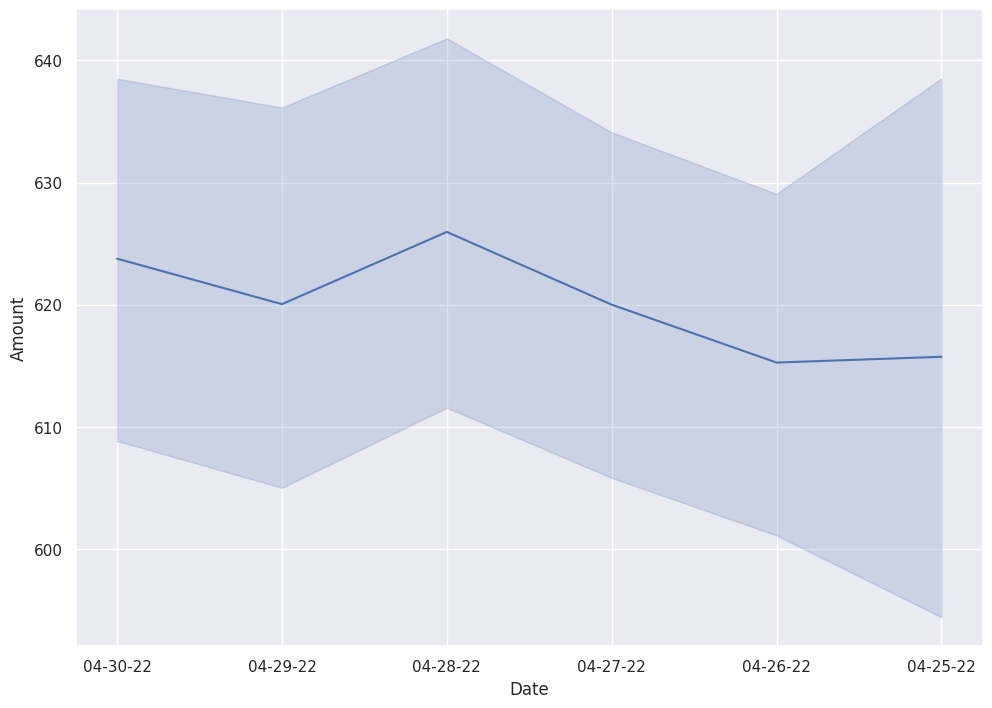

In [ ]:
# timeline plot
import seaborn as sns
sns.set_theme(style="darkgrid",rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df, x="Date", y="Amount")